In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [143]:
files= [file for file in os.listdir('./csvfinal')]
all_months=pd.DataFrame()
for file in files:
    df=pd.read_csv("C:\\Users\\akash\\Desktop\\python-pandas\\projects\\csvfinal\\"+file)
    all_months=pd.concat([all_months,df])
all_months.to_csv("all_data.csv",index=False)

In [144]:
df=pd.read_csv("all_data.csv")
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [145]:
df['Order Date']=df['Order Date'].astype("string")

adding a new column for months

In [146]:
df['months']=df['Order Date'].str[0:2]
null_df=df[df.isnull()]
print(null_df)

       Order ID Product Quantity Ordered Price Each Order Date  \
0           NaN     NaN              NaN        NaN       <NA>   
1           NaN     NaN              NaN        NaN       <NA>   
2           NaN     NaN              NaN        NaN       <NA>   
3           NaN     NaN              NaN        NaN       <NA>   
4           NaN     NaN              NaN        NaN       <NA>   
...         ...     ...              ...        ...        ...   
186845      NaN     NaN              NaN        NaN       <NA>   
186846      NaN     NaN              NaN        NaN       <NA>   
186847      NaN     NaN              NaN        NaN       <NA>   
186848      NaN     NaN              NaN        NaN       <NA>   
186849      NaN     NaN              NaN        NaN       <NA>   

       Purchase Address months  
0                   NaN   <NA>  
1                   NaN   <NA>  
2                   NaN   <NA>  
3                   NaN   <NA>  
4                   NaN   <NA>  
...      

cleaning the data

In [147]:
df.dropna(axis=0,inplace=True)
df.drop_duplicates(inplace=True)
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


changing the datatype of months to int

In [148]:
df=df[df['months']!="Or"]
df['months']=df['months'].astype('int32')
df.dtypes

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\1244036259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['months']=df['months'].astype('int32')


Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          string[python]
Purchase Address            object
months                       int32
dtype: object

Question 1) What was the best month for sales? How much was earned that month?

Add a sales colulmn 

In [149]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])
df['sales']=df['Price Each']*df['Quantity Ordered']
df.head()

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\1584894392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
C:\Users\akash\AppData\Local\Temp\ipykernel_5728\1584894392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each']=pd.to_numeric(df['Price Each'])
C:\Users\akash\AppData\Local\Temp\ipykernel_5728\1584894392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Text(0.5, 1.0, 'Sales Bar Graph')

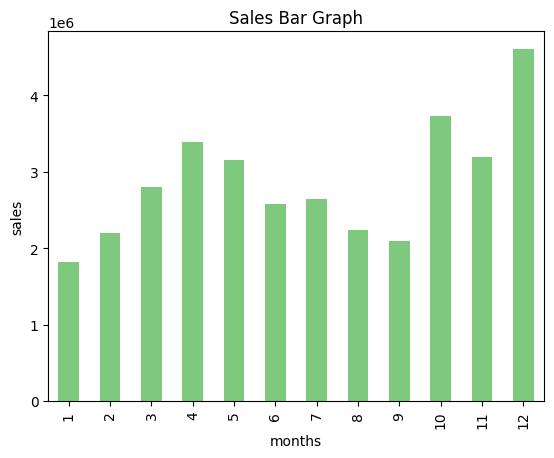

In [150]:
colr=np.random.randint(0,100,12)
df.groupby('months')["sales"].sum().plot(kind="bar", colormap="Accent")
plt.xlabel("months")
plt.ylabel("sales")
plt.title("Sales Bar Graph")

In [151]:
month=np.array(df['months'])
sale=np.array(df['sales'])

In [152]:
df.groupby('months')["sales"].sum().idxmax()

12

In [153]:
df.groupby('months')["sales"].sum().max()

4608295.7

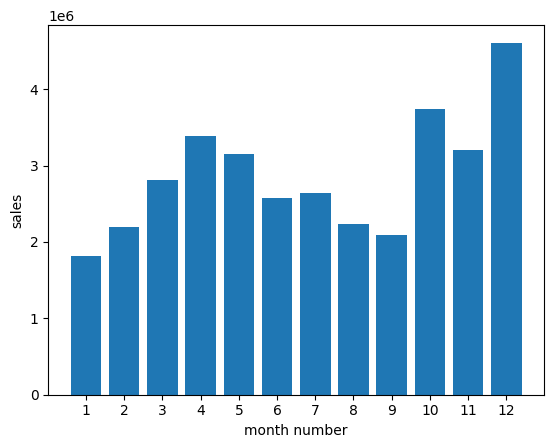

In [154]:
xvlauess=range(1,13)
results=df.groupby('months').sum()
plt.bar(xvlauess,results['sales'])
plt.xticks(xvlauess)
plt.xlabel("month number")
plt.ylabel("sales")
plt.show()

In [155]:
df['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185686, dtype: object

In [156]:
df["Purchase Address"]=df["Purchase Address"].astype('string')

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\115977241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Purchase Address"]=df["Purchase Address"].astype('string')


In [157]:
df['City Code']=df["Purchase Address"].str[-5:]

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\709010962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City Code']=df["Purchase Address"].str[-5:]


In [158]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,City Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,90001


<Axes: xlabel='City Code'>

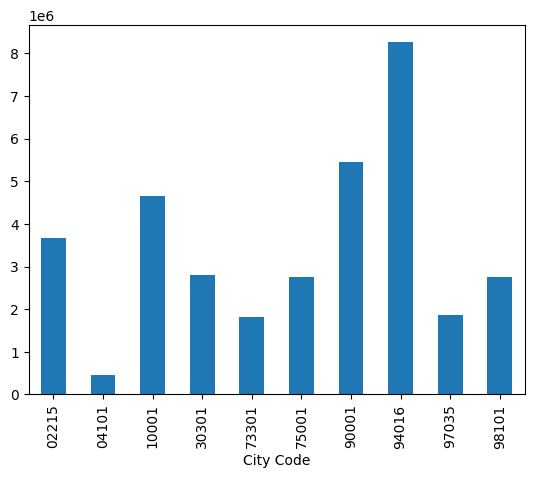

In [159]:
df.groupby('City Code')["sales"].sum().plot(kind='bar')

In [160]:
def get_city(address):
    return address.split(',')[1]
def state(address):
    return address.split(',')[2].split(' ')[1]
df['city'] = df['Purchase Address'].apply(lambda x: get_city(x) + "," + state(x))

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\2761777812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['Purchase Address'].apply(lambda x: get_city(x) + "," + state(x))


<Axes: xlabel='city'>

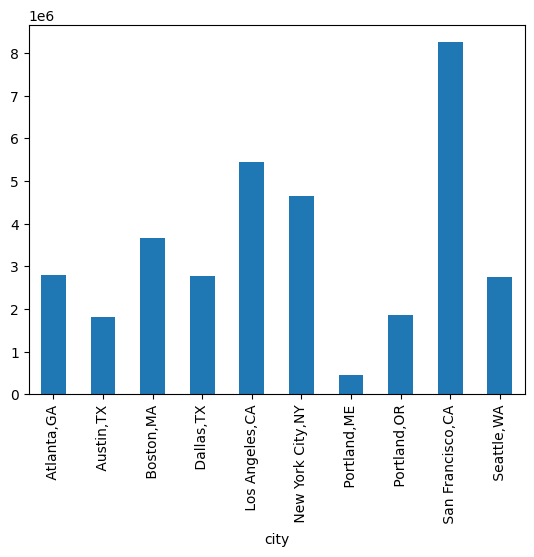

In [161]:
df.groupby('city')["sales"].sum().plot(kind="bar")

In [162]:
df.groupby('city')["sales"].sum()

city
Atlanta,GA          2794199.07
Austin,TX           1818044.33
Boston,MA           3658627.65
Dallas,TX           2765373.96
Los Angeles,CA      5448304.28
New York City,NY    4661867.14
Portland,ME          449321.38
Portland,OR         1870010.56
San Francisco,CA    8254743.55
Seattle,WA          2745046.02
Name: sales, dtype: float64

In [163]:
df["Order Date"]=pd.to_datetime(df['Order Date'])

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\2990466014.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"]=pd.to_datetime(df['Order Date'])
C:\Users\akash\AppData\Local\Temp\ipykernel_5728\2990466014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Date"]=pd.to_datetime(df['Order Date'])


In [164]:
df['hour']=df['Order Date'].dt.hour

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\778922794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df['Order Date'].dt.hour


In [165]:
df['minute']=df['Order Date'].dt.minute
df.head(2)

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\1484540386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute']=df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,City Code,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,75001,"Dallas,TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,02215,"Boston,MA",22,30


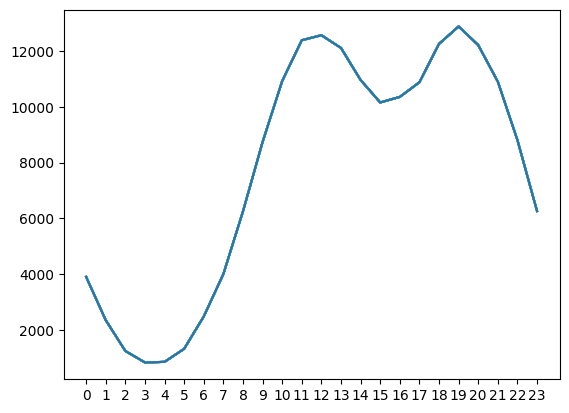

In [166]:
hr= [hour for hour, a in df.groupby('hour')]
s= df.groupby(["hour"]).count()
plt.plot(hr,s)
plt.xticks(hr)
plt.show()

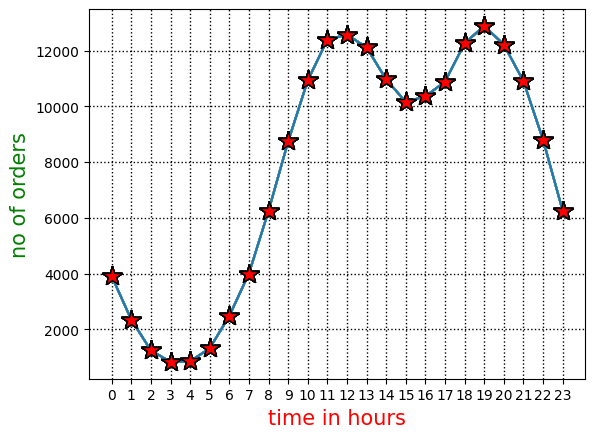

In [167]:
hr=df.sort_values(by="hour", ascending=True)
x=hr['hour'].unique()
y=hr.groupby(['hour']).count()
plt.plot(x,y,marker='*', ms="15", mec='k', mfc='r')
plt.xticks(x)
plt.xlabel("time in hours", c='r', size='15')
plt.ylabel('no of orders', c='g', size='15')
plt.grid(ls=':', lw='1', color='black')
plt.show()

In [170]:
# df.shape
df.reset_index(inplace=True,drop=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,City Code,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,75001,"Dallas,TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,02215,"Boston,MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,90001,"Los Angeles,CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,90001,"Los Angeles,CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,90001,"Los Angeles,CA",9,27


In [169]:
df['Product'].nunique()

19

In [197]:
temp = df[df['Order ID'].duplicated(keep=False)]
temp['grp_products'] = temp.groupby('Order ID')["Product"].transform(lambda x: ",".join(x))
temp = temp[['Order ID','grp_products']].drop_duplicates()
temp.head()

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\4088704002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['grp_products'] = temp.groupby('Order ID')["Product"].transform(lambda x: ",".join(x))


,Order ID,grp_products
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [204]:
temp.groupby('grp_products')['Order ID'].count().idxmax()

'iPhone,Lightning Charging Cable'

In [205]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,City Code,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,75001,"Dallas,TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,02215,"Boston,MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,90001,"Los Angeles,CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,90001,"Los Angeles,CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,90001,"Los Angeles,CA",9,27


In [211]:
temp=df.groupby('Product')["Quantity Ordered"].sum()
temp.idxmax()

'AAA Batteries (4-pack)'

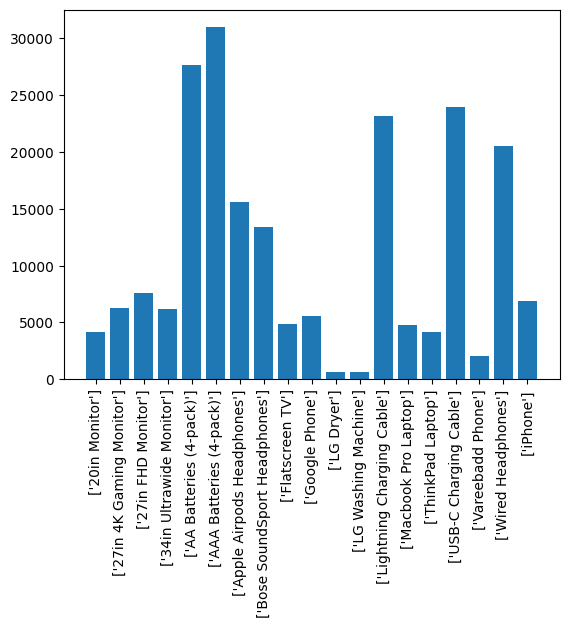

In [272]:
# df.groupby('Product')["Quantity Ordered"].sum().plot(kind="line")
p=pd.Series(df.groupby('Product')['Product'].unique()).astype('string')
q=np.array(df.groupby('Product')["Quantity Ordered"].sum())
a=np.array(p)
plt.bar(a,q)
plt.xticks(p,rotation='vertical')
plt.show()

In [222]:
df.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

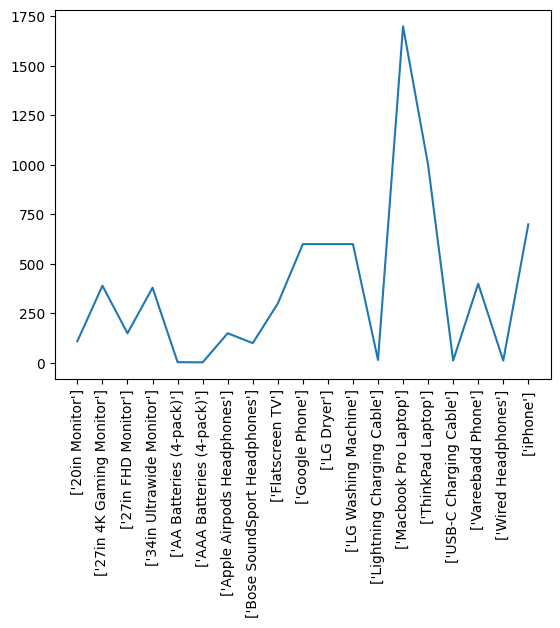

In [269]:
cost=pd.Series(df.groupby('Product')['Price Each'].mean())
c=np.array(cost)
plt.plot(a,c)
plt.xticks(p,rotation='vertical')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_5728\661374062.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs1.set_xticklabels(a,rotation='vertical', size=8)


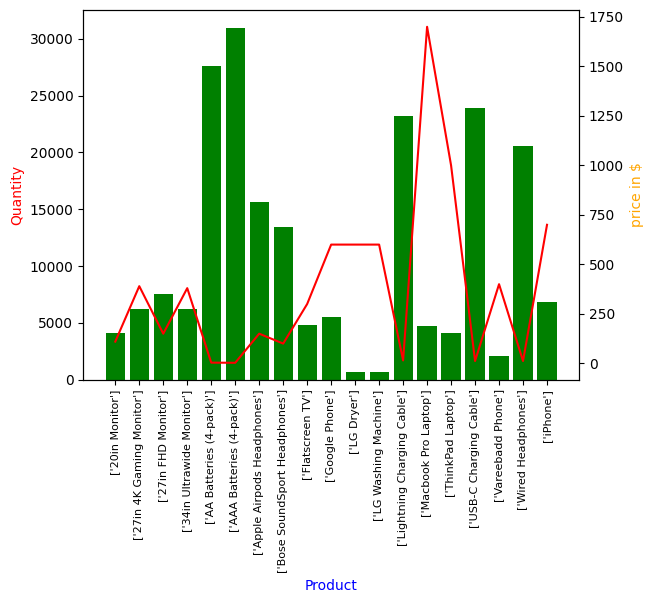

In [277]:
fig,axs1=plt.subplots()
axs2=axs1.twinx()
axs1.bar(a,q, color='g')
axs2.plot(a,c,'r')
axs1.set_xlabel("Product",color="b")
axs1.set_ylabel("Quantity",color="r")
axs2.set_ylabel("price in $",color='orange')
axs1.set_xticklabels(a,rotation='vertical', size=8)
plt.show()